## Gathering Data

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the 'twitter-archive-enhanced.csv' into a DataFrame
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
import requests
import os
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [3]:
image_df=pd.read_csv('image-predictions.tsv',sep='\t')

Ref: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [4]:
import tweepy

#Load each tweet in the tweet-archive-enhanced file using tweepy api.
consumer_key=""
consumer_secret=""
oauth_token = ""
oauth_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(oauth_token, oauth_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
#Add each tweet to the tweet_json.txt file.
import json

with open('tweet_json.txt', 'w') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except Exception as e:
            continue

Rate limit reached. Sleeping for: 234
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 296


In [6]:
tweet_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
        twitter_data = json.loads(line)
        tweet_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})
    
# Convert the list of dictionaries to a dataframe
twitter_data = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [7]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7051,33905,9245661
1,892177421306343426,5325,29395,9245661
2,891815181378084864,3502,22116,9245661
3,891689557279858688,7258,37038,9245594
4,891327558926688256,7799,35372,9245661


## Asseccing Data

In [8]:
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7051,33905,9245661
1,892177421306343426,5325,29395,9245661
2,891815181378084864,3502,22116,9245661
3,891689557279858688,7258,37038,9245594
4,891327558926688256,7799,35372,9245661


In [11]:
df.shape

(2356, 17)

In [12]:
image_df.shape

(2075, 12)

In [13]:
twitter_data.shape

(2327, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   object
 1   retweet_count    2327 non-null   int64 
 2   favorite_count   2327 non-null   int64 
 3   followers_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [19]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
twitter_data.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [22]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
twitter_data.describe()

,retweet_count,favorite_count,followers_count
count,2327.000000,2327.000000,2.327000e+03
mean,2484.747744,7072.762785,9.245683e+06
std,4207.942103,10989.424850,4.466817e+01
min,1.000000,0.000000,9.245277e+06
25%,498.000000,1228.000000,9.245672e+06
50%,1155.000000,3056.000000,9.245691e+06
75%,2877.500000,8627.500000,9.245696e+06
max,71132.000000,145274.000000,9.246077e+06


In [25]:
sum(df.tweet_id.duplicated())

0

In [26]:
sum(image_df.tweet_id.duplicated())

0

In [27]:
sum(twitter_data.tweet_id.duplicated())

0

In [28]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [29]:
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [30]:
twitter_data.nunique()

tweet_id           2327
retweet_count      1653
favorite_count     1961
followers_count      30
dtype: int64

In [31]:
np.sort(df.rating_numerator.unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [32]:
np.sort(df.rating_denominator.unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [44]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [33]:
#See invalid values. rating_numerator>20
print(df.loc[df.rating_numerator == 88, 'text']) 
print(df.loc[df.rating_numerator == 84, 'text']) 
print(df.loc[df.rating_numerator == 960, 'text']) 
print(df.loc[df.rating_numerator == 24, 'text']) 
print(df.loc[df.rating_numerator == 182, 'text']) 
print(df.loc[df.rating_numerator == 27, 'text']) 
print(df.loc[df.rating_numerator == 666, 'text']) 
print(df.loc[df.rating_numerator == 165, 'text']) 
print(df.loc[df.rating_numerator == 1776, 'text'])
print(df.loc[df.rating_numerator == 204, 'text']) 
print(df.loc[df.rating_numerator == 99, 'text'])
print(df.loc[df.rating_numerator == 50, 'text']) 
print(df.loc[df.rating_numerator == 45, 'text']) 
print(df.loc[df.rating_numerator == 60, 'text']) 
print(df.loc[df.rating_numerator == 44, 'text']) 
print(df.loc[df.rating_numerator == 143, 'text']) 
print(df.loc[df.rating_numerator == 121, 'text'])
print(df.loc[df.rating_numerator == 20, 'text'])
print(df.loc[df.rating_numerator == 26, 'text']) 
print(df.loc[df.rating_numerator == 144, 'text'])
print(df.loc[df.rating_numerator == 80, 'text']) 
print(df.loc[df.rating_numerator == 0, 'text']) 
print(df.loc[df.rating_numerator == 420, 'text']) 
print(df.loc[df.rating_numerator == 75, 'text']) 

1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
Name: text, dtype: object
1274    From left to right:\nCl

In [34]:
#See full text
print("1. " +df['text'][1843]) #88/80=11/10. 
print("2. " +df['text'][433]) #84/70=12/10. 
print("3. " +df['text'][313]) #No photo. This is a reply tweet so delete this one.
print("4. " +df['text'][516]) #This is not a rating tweet. Delete this.
print("5. " +df['text'][290]) #This is a reply tweet. No photo so delete this one.
print("6. " +df['text'][763]) #It was stored as 27 but actual rating was 11.27/10. Change rating_numerator to 11.27.
print("7. " +df['text'][189]) #No photo. This is a reply tweet so delete this one.
print("8. " +df['text'][902]) #165/150=11/10. 
print("9. " +df['text'][979]) #Happy July 4th tweet. This is an invalid rating so delete this one.
print("10. " +df['text'][1120]) #204/107=12/10.
print("11. " +df['text'][1228]) #99/90=11/10.
print("12. " +df['text'][1202]) #Actual rating is 11/10.
print("13. " +df['text'][1274]) #45/50=9/10
print("14. " +df['text'][1351]) #60/50=12/10
print("15. " +df['text'][1433]) #44/40=11/10
print("16. " +df['text'][1634]) #143/130=11/10.
print("17. " +df['text'][1635]) #121/110=11/10.
print("18. " +df['text'][1663]) #No photo. Delete this one.
print("19. " +df['text'][1712]) #It was stored 26 but actual rating is 11.26/10. Change rating_numerator to 11.26.
print("20. " +df['text'][1779]) #144/120=12/10.
print("21. " +df['text'][1254]) #80/80=10/10.
print("22. " +df['text'][315]) #Report of plagiarism. Delete this one.
print("23. " +df['text'][1016]) #Not a dog photo. Delete this one.
print("24. " +df['text'][188]) #No photo. This is a reply tweet so delete this one.
print("25. " +df['text'][2074]) #Not a dog photo. Delete this one.
print("26. " +df['text'][340]) #Stored as 75 but actual rating is 9.75/10. Change rating_numerator to 9.75.
print("27. " +df['text'][695]) #Stored as 75 but actual rating is 9.75/10. Change rating_numerator to 9.75.

1. Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
2. The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
3. @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
4. Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
5. @markhoppus 182/10
6. This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
7. @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
8. Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
9. This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
10. Say hello to this unb

In [35]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [36]:
#Print invalid denominator. rating_denominator!=10
print(df.loc[df.rating_denominator == 11, 'text'])
print(df.loc[df.rating_denominator == 50, 'text'])
print(df.loc[df.rating_denominator == 20, 'text']) 
print(df.loc[df.rating_denominator == 80, 'text'])
print(df.loc[df.rating_denominator == 70, 'text'])
print(df.loc[df.rating_denominator == 7, 'text'])
print(df.loc[df.rating_denominator == 15, 'text'])
print(df.loc[df.rating_denominator == 150, 'text'])
print(df.loc[df.rating_denominator == 170, 'text'])
print(df.loc[df.rating_denominator == 0, 'text'])
print(df.loc[df.rating_denominator == 90, 'text'])
print(df.loc[df.rating_denominator == 40, 'text'])
print(df.loc[df.rating_denominator == 130, 'text'])
print(df.loc[df.rating_denominator == 110, 'text'])
print(df.loc[df.rating_denominator == 16, 'text']) 
print(df.loc[df.rating_denominator == 120, 'text'])
print(df.loc[df.rating_denominator == 2, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: 

In [37]:
#Ignore the repeated ones and print the new invalid ones.
print("1. "+df['text'][784]) #This is a retweet tweet. Delete this one.
print("2. "+df['text'][1068]) #actual rating 14/10. Change rating_denominator to 10.
print("3. "+df['text'][1662]) #actual rating 10/10. Change rating_denominator to 10. 
print("4. "+df['text'][1165]) #actual rating 13/10. Change rating_denominator to 10.
print("5. "+df['text'][1598]) #No photo. Delete this one.
print("6. "+df['text'][342]) #No photo. This is a reply tweet.
print("7. "+df['text'][2335]) #9/10.

1. RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2. After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
3. This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
4. Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
5. Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
6. @docmisterio account started on 11/15/15
7. This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [58]:
print(df['source'][0])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [38]:
for i in df['source']:
    if "iPhone" in i:
        pass
    else:
        print(i)

<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.c

In [39]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [40]:
sum(image_df['jpg_url'].duplicated())

66

### Quality Issues
1. By looking at the "rating_denominator" and "rating_nominator", some of them don't have photoes or value is insufficient. Correct these/ delte these.
2. After cleaning "rating_denominator" and "rating_nominator", they should be divided and stored in one column to make sufficient comparison.
3. df and image_df's tweet_id are int data type but twitter_data's tweet_id is a string. Change data type of "twitter_id" from int to string. 
4. "timestamp" column is not datetime format. 
5. Remove retweets. "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" is not null, then that tweet is a retweet.
6. Too many missing data in columns: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", and "expanded_urls".
7. There are "None", "a", "an", 'very','the', 'not', 'quite', and 'actually' in name column of df. Change all of these to "None" 
8. Some are lower cases in column "p1", "p2", and "p3" of image_df. 
9. There are duplicated images(jpg_urls).

### Tidiness Issues
1. Combine "doggo","floofer","pupper", and "puppo" into one column that is a categorical variable.(df)
2. Combine p1,p2,p3 into one column that is a categorical variable(image_df)
3. merge the dataframe df, image_df, and twitter_data since they share "tweet_id" column.


## Cleaning Data

In [731]:
#Create a copy for each so we don't lose the original one.
df_clean=df.copy()
image_clean=image_df.copy()
json_clean=twitter_data.copy()

#### Quality Issue 1

Define:

Drop tweets that are insufficient and fix ones that mistakenly recorded.

Code:

In [732]:
#Delte insufficient tweets(retweet,reply, no photo etc.)
df_clean=df_clean.drop([313,516,290,189,979,1663,315,1016,188,2074,784,1598,342])

In [733]:
#Change data type of rating_numerator and denominator to float
df_clean['rating_numerator']=df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator']=df_clean['rating_denominator'].astype(float)

#Fix rating_numerator that have decimals.
df_clean.loc[(df_clean.tweet_id==778027034220126208	), 'rating_numerator']=11.27
df_clean.loc[(df_clean.tweet_id==680494726643068929	), 'rating_numerator']=11.26
df_clean.loc[(df_clean.tweet_id==832215909146226688), 'rating_numerator']=9.75
df_clean.loc[(df_clean.tweet_id==786709082849828864), 'rating_numerator']=9.75

#Fix rating_numerator and rating_denominator
df_clean.loc[(df_clean.tweet_id==716439118184652801), 'rating_numerator']=11
df_clean.loc[(df_clean.tweet_id==716439118184652801), 'rating_denominator']=10

df_clean.loc[(df_clean.tweet_id==740373189193256964), 'rating_numerator']=14
df_clean.loc[(df_clean.tweet_id==740373189193256964), 'rating_denominator']=10

df_clean.loc[(df_clean.tweet_id==682962037429899265), 'rating_numerator']=10
df_clean.loc[(df_clean.tweet_id==682962037429899265), 'rating_denominator']=10

df_clean.loc[(df_clean.tweet_id==722974582966214656), 'rating_numerator']=13
df_clean.loc[(df_clean.tweet_id==722974582966214656), 'rating_denominator']=10

Test:

In [734]:
df_clean.rating_numerator.unique()

array([ 13.  ,  12.  ,  14.  ,   5.  ,  17.  ,  11.  ,  10.  ,   6.  ,
        15.  ,   9.75,   7.  ,  84.  ,   9.  ,   8.  ,   1.  ,  11.27,
         3.  ,   4.  , 165.  , 204.  ,  99.  ,  80.  ,  45.  ,  60.  ,
        44.  , 143.  , 121.  ,  11.26,   2.  , 144.  ,  88.  ])

In [735]:
df_clean.rating_denominator.unique()

array([ 10.,  70., 150., 170.,  90.,  80.,  50.,  40., 130., 110., 120.,
         2.])

#### Quality Issue 2

Define:

Use rating_numerator and rating_denominator into one column. Then delete rating_numerator and rating_denominator.

Code:

In [736]:
#Use rating_numerator and rating_denominator into one column.
df_clean['rating']=df_clean['rating_numerator']/df_clean['rating_denominator']

#Delete rating_numerator and rating_denominator
df_clean=df_clean.drop(['rating_numerator', 'rating_denominator'],axis=1)

Test:

In [737]:
df_clean.rating.unique()

array([1.3  , 1.2  , 1.4  , 0.5  , 1.7  , 1.1  , 1.   , 0.6  , 1.5  ,
       0.975, 0.7  , 0.9  , 0.8  , 0.1  , 1.127, 0.3  , 0.4  , 1.126,
       0.2  ])

#### Quality Issue 3

Define:

Delete columns that we don't need for our analysis

Code:

In [738]:
#Change tweet_id to string
df_clean['tweet_id']=df_clean['tweet_id'].astype(str)
image_clean['tweet_id']=image_clean['tweet_id'].astype(str)

Test:

In [739]:
print(np.dtype(df_clean.tweet_id))
print(np.dtype(image_clean.tweet_id))

object
object


#### Quality Issue 4

Define:

Some dog names are incorrect like "a", "an","very" etc. Fix these names.

Code:

In [740]:
#Change no name rows all into "None"
df_clean[df_clean['name'].str.match('[a-z]+')] = 'None'

Test:

In [741]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

#### Quality Issue 5

Define:

Some breeds are in lower cases(p1,p2,p3 column)

Code:

In [742]:
#Capitalize p1, p2, and p3
image_clean['p1']=image_clean['p1'].str.capitalize()
image_clean['p2']=image_clean['p2'].str.capitalize()
image_clean['p3']=image_clean['p3'].str.capitalize()

Test:

In [743]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue 6

Define:

Remove retweets. 

Code:

In [744]:
#Remove retweets
df_clean=df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean=df_clean[df_clean['retweeted_status_user_id'].isnull()]
df_clean=df_clean[df_clean['retweeted_status_timestamp'].isnull()]

Test:

In [745]:
#See if there is any retweets
print(df_clean.shape)
sum(df_clean['retweeted_status_id'].isnull())

(2059, 16)


2059

In [746]:
sum(df_clean['retweeted_status_user_id'].isnull())

2059

In [747]:
sum(df_clean['retweeted_status_timestamp'].isnull())

2059

#### Quality Issue 7

Define:

Delete columns that we don't need for our analysis

Code:

In [748]:
#Drop columns that we won't use for analysis
df_clean=df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls','source'],axis=1)

Test:

In [749]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating'],
      dtype='object')

#### Quality Issue 8

Define:

There are duplicated images(jpg_urls)

Code:

In [750]:
#Drop duplicates
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

Test:

In [751]:
sum(image_clean['jpg_url'].duplicated())

0

#### Tidiness Issue 1

Define:

Put doggo, floofer, pupper, and puppo into one column. After combining them, delete those 4 columns.

Code:

In [752]:
#Combine doggo, floofer, pupper, puppo into one column
df_clean['dog_type']=df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#Delete column doggo,floofer, pupper, and puppo
df_clean=df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

Test:

In [753]:
print(sum(df_clean['dog_type']=='doggo'))
print(sum(df_clean['dog_type']=='floofer'))
print(sum(df_clean['dog_type']=='pupper'))
print(sum(df_clean['dog_type']=='puppo'))

81
4
231
32


####  Tidiness Issue 2

Define:

We will only want the dog's breed. Extracting from p1,p2,p3

Code:

In [754]:
#Put p1,p2,p3 in one column by comparing whether it's True or False.
image_clean['breed']='None'

for i, row in image_clean.iterrows():
    if row.p1_dog:
        image_clean.at[i, 'breed']=row.p1
    elif row.p2_dog:
        image_clean.at[i, 'breed']=row.p2

    elif row.p3_dog:
        image_clean.at[i, 'breed']=row.p3
    else:
        image_clean.at[i, 'breed']=='None'
        
#Drop p1, p2, p3 columns
image_clean=image_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

Test:

In [755]:
image_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher


#### Tidiness Issue 3

Define:

Merge the three dataframe into one dataframe

Code:

In [756]:
#Merge df_clean,image_clean, and json_clean.
df2= pd.merge(df_clean, image_clean, how = 'outer', on = ['tweet_id'])
twitter_df=pd.merge(df2,json_clean,how='outer',on=['tweet_id'])

Test:

In [757]:
twitter_df.head()

,tweet_id,timestamp,text,name,rating,dog_type,jpg_url,img_num,breed,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,7051.0,33905.0,9245661.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5325.0,29395.0,9245661.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,3502.0,22116.0,9245661.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,7258.0,37038.0,9245594.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,7799.0,35372.0,9245661.0


In [758]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2345 non-null   object 
 1   timestamp        2059 non-null   object 
 2   text             2059 non-null   object 
 3   name             2059 non-null   object 
 4   rating           2059 non-null   object 
 5   dog_type         348 non-null    object 
 6   jpg_url          2009 non-null   object 
 7   img_num          2009 non-null   float64
 8   breed            2009 non-null   object 
 9   retweet_count    2327 non-null   float64
 10  favorite_count   2327 non-null   float64
 11  followers_count  2327 non-null   float64
dtypes: float64(4), object(8)
memory usage: 238.2+ KB


#### Quality Issue 9

Define:

Change timestamp column from string to timestamp data type.

Code:

In [759]:
#remove timezone
twitter_df['timestamp'] = twitter_df['timestamp'].str.slice(start=0, stop=-6)

#Change datatype of timestamp column to datetime
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'], format = '%Y-%m-%d %H:%M:%S')

Test:

In [760]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2345 non-null   object        
 1   timestamp        2059 non-null   datetime64[ns]
 2   text             2059 non-null   object        
 3   name             2059 non-null   object        
 4   rating           2059 non-null   object        
 5   dog_type         348 non-null    object        
 6   jpg_url          2009 non-null   object        
 7   img_num          2009 non-null   float64       
 8   breed            2009 non-null   object        
 9   retweet_count    2327 non-null   float64       
 10  favorite_count   2327 non-null   float64       
 11  followers_count  2327 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 238.2+ KB


#### Quality Issue 10

Define:

Change rating from string to float

Code:

In [761]:
twitter_df['rating'] = pd.to_numeric(twitter_df['rating'], errors='coerce')

Test:

In [762]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2345 non-null   object        
 1   timestamp        2059 non-null   datetime64[ns]
 2   text             2059 non-null   object        
 3   name             2059 non-null   object        
 4   rating           2059 non-null   float64       
 5   dog_type         348 non-null    object        
 6   jpg_url          2009 non-null   object        
 7   img_num          2009 non-null   float64       
 8   breed            2009 non-null   object        
 9   retweet_count    2327 non-null   float64       
 10  favorite_count   2327 non-null   float64       
 11  followers_count  2327 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 238.2+ KB


### Storing Data

In [763]:
twitter_df.to_csv("twitter_archive_master.csv",index=False,encoding='utf-8')

### Analyzing and Visualizing Data

1. Visualize the total number of tweets over time to see whether that number increases, or decreases, over time.
2. What is the most popular dog breed
3. What is the most popular dog name
4. What is the highest rating dog breed
5. What is the highest rating dog name

### 1. Visualize the total number of tweets over time to see whether that number increases, or decreases, over time.

Text(0, 0.5, 'Number of Tweets')

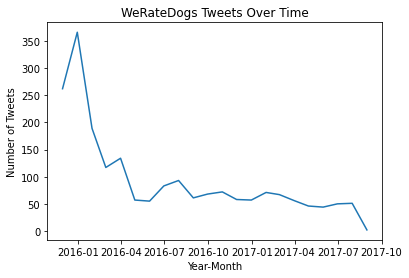

In [764]:
monthly_timestamp=twitter_df.groupby(pd.Grouper(key='timestamp',freq='M')).count().reset_index()
monthly_timestamp=monthly_timestamp[['timestamp','tweet_id']]

plt.plot(monthly_timestamp.timestamp,monthly_timestamp.tweet_id)
plt.title("WeRateDogs Tweets Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Tweets")

### 2. What is the most popular dog breed

In [765]:
#What is the most shown breed?
breed_rank=twitter_df.breed.value_counts()
breed_rank.head()

None                  318
Golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
Name: breed, dtype: int64

In [766]:
#Group by breed and calculate mean for each breed
dog_b=twitter_df.groupby('breed').mean()
dog_b.head()

,rating,img_num,retweet_count,favorite_count,followers_count
breed,,,,,
Afghan_hound,0.800000,1.000000,4810.000000,6936.333333,9.245666e+06
Airedale,0.983333,1.166667,1126.166667,4505.833333,9.245691e+06
American_staffordshire_terrier,1.100000,1.187500,1661.466667,7209.666667,9.245681e+06
Appenzeller,1.100000,1.000000,1150.500000,6283.500000,9.245676e+06
Australian_terrier,1.150000,2.000000,2517.500000,9562.500000,9.245676e+06


In [767]:
dog_bb.sort_values()

breed
Brabancon_griffon            747.333333
Groenendael                  981.500000
Japanese_spaniel            1116.000000
Irish_wolfhound             1292.000000
Tibetan_terrier             1562.500000
                               ...     
Black-and-tan_coonhound    14698.000000
Bouvier_des_flandres       15398.000000
French_bulldog             16182.931034
Saluki                     20850.000000
Bedlington_terrier         21606.666667
Name: favorite_count, Length: 114, dtype: float64

Show up breed Ranking:
1. None(Not described)
2. Golden_retriever
3. Labrador_retriever
4. Pembroke
5. Chihuahua

Average Favorite Count Ranking:
1. Bedlington_terrier
2. Saluki
3. French_bulldog
4. Bouvier_des_flandres
5. Black-and-tan_coonhound

### 3. What is the most popular dog name

In [768]:
#What is the most shown name?
twitter_df.name.value_counts()

None          670
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shiloh          1
Gustav          1
Arlen           1
Lenox           1
Christoper      1
Name: name, Length: 931, dtype: int64

In [769]:
#Group by name and calculate mean for each breed
dog_n=twitter_df.groupby('name').mean()
dog_n.head()

,rating,img_num,retweet_count,favorite_count,followers_count
name,,,,,
Abby,1.05,1.0,1109.0,4207.0,9245691.0
Ace,1.10,1.0,964.0,3134.0,9245688.0
Acro,1.00,1.0,268.0,1019.0,9245696.0
Adele,1.00,1.0,670.0,2878.0,9245691.0
Aiden,1.10,1.0,566.0,1398.0,9245696.0


In [770]:
dog_nsort=dog_n['favorite_count'].sort_values()
dog_nsort

name
Christoper       160.0
Fwed             168.0
Kallie           182.0
Keet             191.0
Kollin           202.0
                ...   
Duddles        93105.0
Jamesy        109158.0
Stephan       112063.0
Astrid             NaN
Harry              NaN
Name: favorite_count, Length: 931, dtype: float64

In [771]:
dog_nsort[dog_nsort>=60000]

name
Canela      60331.0
Lilly       62701.0
Aja         69436.0
Duddles     93105.0
Jamesy     109158.0
Stephan    112063.0
Name: favorite_count, dtype: float64

Popular Name Ranking:
1. None(Unknown)
2. Charlie
3. Lucy
4. Oliver
5. Cooper
6. Tucker
7. Lola
8. Penny

### 4. What is the highest rating dog breed?

In [772]:
dog_bsort=dog_b['rating'].sort_values()
dog_bsort

breed
Japanese_spaniel               0.500000
Afghan_hound                   0.800000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
Soft-coated_wheaten_terrier    0.900000
                                 ...   
Irish_setter                   1.233333
Briard                         1.233333
Saluki                         1.250000
Bouvier_des_flandres           1.300000
Black-and-tan_coonhound        1.400000
Name: rating, Length: 114, dtype: float64

Top rated dog by breed:
1. Black-and-tan coonhound
2. Bouvier_des_flandres
3. Saluki
4. Briard
5. Tibetan_mastiff

### 5. What is the highest rating dog name?

In [773]:
dog_nsort=dog_n['rating'].sort_values()
dog_nsort

name
Henry      0.2
Tedrick    0.2
Charl      0.3
Chuck      0.3
Tommy      0.3
          ... 
General    1.4
Emmy       1.4
Laika      1.4
Cermet     1.4
Kuyu       1.4
Name: rating, Length: 931, dtype: float64

In [774]:
dog_nsort[dog_nsort>=1.4]

name
Sundance    1.4
Doobert     1.4
Smiley      1.4
Clifford    1.4
Iggy        1.4
General     1.4
Emmy        1.4
Laika       1.4
Cermet      1.4
Kuyu        1.4
Name: rating, dtype: float64

Highest Rating Names:
Clifford, Sundance, Kuyu, Smiley, Laika, Doobert, Cermet, Emmy, General, Iggy        

Every Dog name above has same rating(1.4)

Ref:https://stackoverflow.com/questions/35465741/pandas-convert-column-with-empty-strings-to-float
    https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month